DNN으로 집값 예측하기 2022년 1월 11일 김이룸

**Summary**


*   housing.csv : (506,13)
*   StandardScaler : scaler.fit_transform()
*   sns.boxplot(data=data, palette='dark)
*   split 1 : z_data.drop(12, axis=1)
*   split 2 : train_test_split
*   DNN 구현 : Sequential
*   DNN 학습 : epoch=10
*   DNN 평가 : mse
*   DNN 예측 : z-score



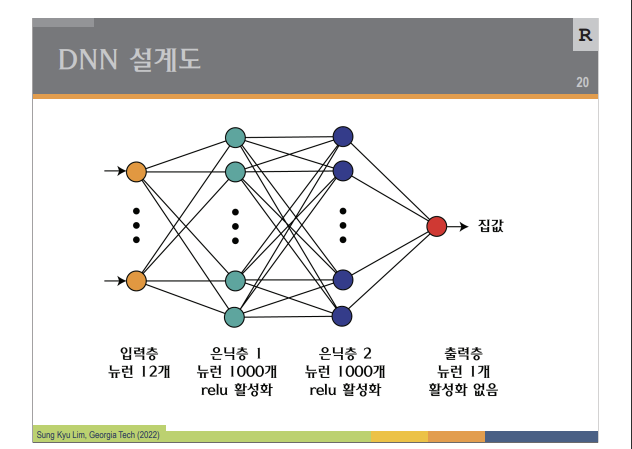

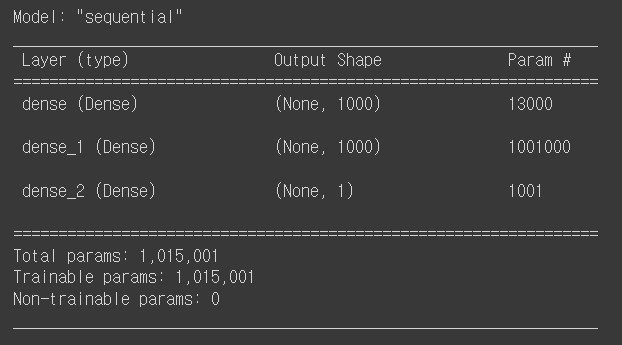

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import time
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
MY_HIDDEN = 1000
MY_EPOCH = 10
MY_BATCH = 64

(506, 13)
      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD  TAX  PTRATIO  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...    1  296     15.3   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...    2  242     17.8   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...    2  242     17.8   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...    3  222     18.7   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...    3  222     18.7   5.33  36.2

[5 rows x 13 columns]
             CRIM          ZN       INDUS  ...     PTRATIO       LSTAT        MEDV
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...   18.455534   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...    2.164946    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...   12.600000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...   17.400000    6.950000   17.025000
50%      0.256510    0.00

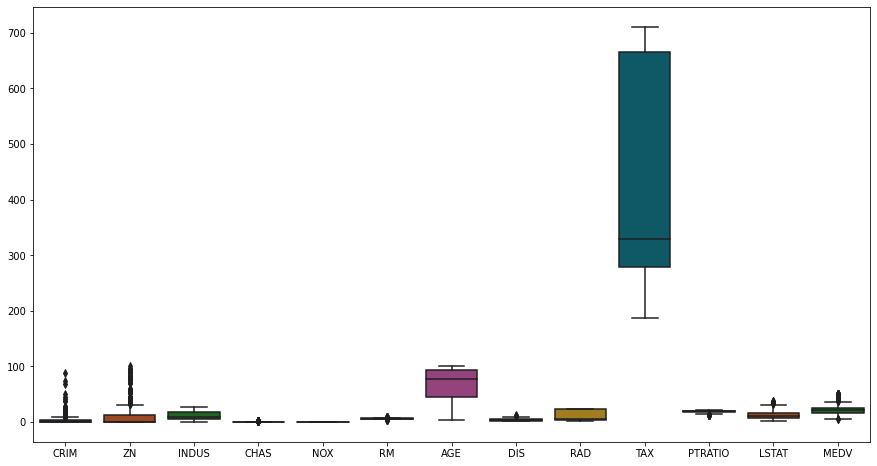

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/my-data/housing.csv')

print(data.shape)
print(data.head())
print(data.describe())

plt.figure(figsize=(15,8))
sns.boxplot(data=data, palette='dark')

(506, 13)
         0         1         2   ...        10        11        12
0 -0.419782  0.284830 -1.287909  ... -1.459000 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381  ... -0.303094 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381  ... -0.303094 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878  ...  0.113032 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878  ...  0.113032 -1.026501  1.487503

[5 rows x 13 columns]
                 0             1   ...            11            12
count  5.060000e+02  5.060000e+02  ...  5.060000e+02  5.060000e+02
mean  -8.688702e-17  3.306534e-16  ... -1.595123e-16 -4.247810e-16
std    1.000990e+00  1.000990e+00  ...  1.000990e+00  1.000990e+00
min   -4.197819e-01 -4.877224e-01  ... -1.531127e+00 -1.908226e+00
25%   -4.109696e-01 -4.877224e-01  ... -7.994200e-01 -5.994557e-01
50%   -3.906665e-01 -4.877224e-01  ... -1.812536e-01 -1.450593e-01
75%    7.396560e-03  4.877224e-02  ...  6.030188e-01  2.685231e-01
max    9.933931e+00  3.804234

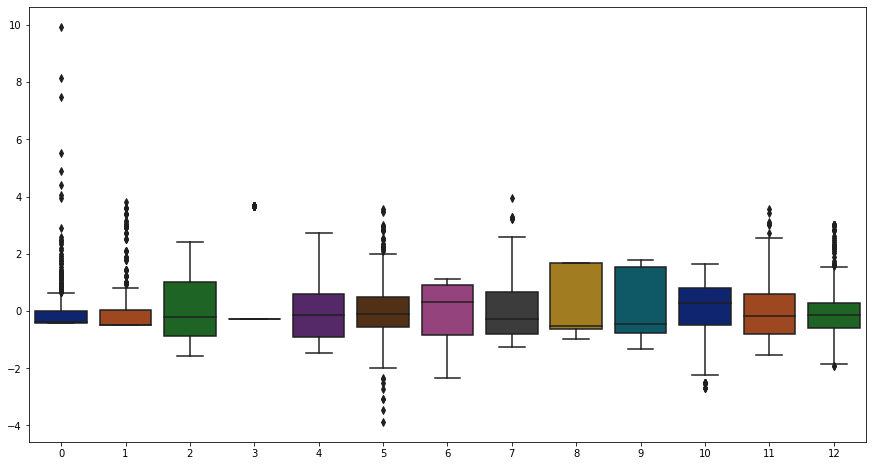

In [ ]:
scaler = StandardScaler()
z_data = scaler.fit_transform(data) # nd.array

z_data = pd.DataFrame(z_data)

print(z_data.shape)
print(z_data.head())
print(z_data.describe()) # mean=0, std=1

plt.figure(figsize=(15,8)) 
sns.boxplot(data=z_data, palette='dark') # y-axis scale

In [ ]:
X_data = z_data.drop(12, axis=1)
Y_data = z_data[12]

X_train, X_test, Y_train, Y_test = train_test_split(X_data,
                                                    Y_data,
                                                    train_size=0.7)

print('학습용 입력 데이터 모양 : ', X_train.shape)
print('학습용 출력 데이터 모양 : ', Y_train.shape)
print('평가용 입력 데이터 모양 : ', X_test.shape)
print('평가용 출력 데이터 모양 : ', Y_test.shape)

학습용 입력 데이터 모양 :  (354, 12)
학습용 출력 데이터 모양 :  (354,)
평가용 입력 데이터 모양 :  (152, 12)
평가용 출력 데이터 모양 :  (152,)


In [ ]:
# DNN 구현
model = Sequential()

# 입력층 + 은닉층1 add
model.add(Dense(units=MY_HIDDEN,
                input_dim=12,
                activation='relu'))

# 은닉층2 add
model.add(Dense(units=MY_HIDDEN,
                activation='relu'))

# 출력층 add
model.add(Dense(units=1))

# DNN 요약 : 여기까지는 '런타임 / 다시시작 및 모두 실행' 하지 않아도 된다. 학습 전까지는 안해도 된다.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              13000     
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_2 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 1,015,001
Trainable params: 1,015,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# DNN 학습
model.compile(optimizer='sgd',
              loss='mse')


print('학습 시작')
begin = time()

model.fit(X_train,
          Y_train,
          epochs=MY_EPOCH,
          verbose=1)

end = time()
print('총 학습 시간:', end - begin)

학습 시작
Epoch 1/10
12/12 [==============================] - 1s 13ms/step - loss: 0.8183
Epoch 2/10
12/12 [==============================] - 0s 12ms/step - loss: 0.4634
Epoch 3/10
12/12 [==============================] - 0s 11ms/step - loss: 0.3653
Epoch 4/10
12/12 [==============================] - 0s 12ms/step - loss: 0.3108
Epoch 5/10
12/12 [==============================] - 0s 12ms/step - loss: 0.2786
Epoch 6/10
12/12 [==============================] - 0s 12ms/step - loss: 0.2375
Epoch 7/10
12/12 [==============================] - 0s 11ms/step - loss: 0.2372
Epoch 8/10
12/12 [==============================] - 0s 11ms/step - loss: 0.2127
Epoch 9/10
12/12 [==============================] - 0s 12ms/step - loss: 0.2057
Epoch 10/10
12/12 [==============================] - 0s 12ms/step - loss: 0.1911
총 학습 시간: 2.1406514644622803


In [ ]:
# DNN 평가
score = model.evaluate(X_test,
               Y_test)

print('최종 mse 손실값 : ', score)

5/5 [==============================] - 0s 5ms/step - loss: 0.1204
최종 mse 손실값 :  0.12038474529981613


In [ ]:
# DNN 예측

pred = model.predict(X_test)
print('0번 집값 예측 (Z-점수) : ', pred[0][0])
print('0번 집값 정답 (Z-점수) : ', Y_test.iloc[0])  # iloc

0번 집값 예측 (Z-점수) :  1.2770488
0번 집값 정답 (Z-점수) :  1.3677816591716967
